# Machine Learning Engineer Nanodegree
## Capstone Project
## Project 5: Negotiating Buying a Home  

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
%matplotlib inline

try:
    data = pd.read_csv("data.csv")
    data = data.drop(['PID', 'Status', 'Address', 'Subdivision'], axis = 1)
    print "Dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Dataset has 237 samples with 7 features each.


## Data Preprocessing
In this section, we will preprocess the data by cleaning data and and removing outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Data Cleaning

We need to clean the data before we can do any analysis.  The statistics above shows that the minimum value for Fin SF is 0.  This is already a problem since a home cannot have Fin SF of zero for its size.  All the values in each column must be greater than zero.  Therefore, any row that contains values less than 1 will be removed.  Rows with null values will be removed as well.  Finally, we make sure that # Rooms is at least equal to the sum of # of Bedrooms and # Baths.

In [13]:
zero_or_negative = []
for i, r in data.iterrows():
    for c in data.columns:
        if r[c] <= 0:
            zero_or_negative.append(i)  

data = data.dropna().drop(data.index[zero_or_negative].unique())
data = data[data['# Rooms'] - data['# Bedrooms'] - data['# Baths'] >= 0]
data = data.reset_index(drop = True)
display(data.describe())

,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.376068,2.023932,7.158120,1735.910256,209309.217949,205768.098291,40.213675
std,0.543814,0.351245,1.338036,346.664927,44735.681218,43217.123404,45.927696
min,3.000000,1.000000,5.000000,1016.000000,107900.000000,102000.000000,1.000000
25%,3.000000,2.000000,6.000000,1518.500000,174950.000000,174950.000000,8.250000
50%,3.000000,2.100000,7.000000,1662.000000,209950.000000,205000.000000,23.500000
75%,4.000000,2.100000,8.000000,1899.000000,238587.500000,235000.000000,56.000000
max,5.000000,3.000000,12.000000,3135.000000,375950.000000,355000.000000,384.000000


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [15]:
# For each feature find the data points with extreme high or low values
index_to_outliers = {}
for c in data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))] 
    display(outliers)
    
    for i in outliers.index.tolist():
        if i in index_to_outliers:
            index_to_outliers[i] += 1
        else:
            index_to_outliers[i] = 1
    
filtered_dict = {k:v for k,v in index_to_outliers.iteritems() if v > 1}
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [filtered_dict.keys()]

# Remove the outliers, if any were specified
data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


Data points considered outliers for the feature 'Days On Market':


,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Sales Price,Days On Market
7,3,2.0,6,1530,134500,155000,132
41,3,2.0,8,1480,165000,148000,384
72,4,2.0,6,1404,182500,174000,178
110,4,2.1,11,1840,204950,180000,237
123,4,2.1,8,1954,209950,209950,156
135,3,2.0,10,1560,217950,216000,136
163,5,3.0,10,2492,232500,230000,171
189,4,2.1,8,2000,247500,235000,129
215,4,2.1,10,2548,269950,265000,157
233,5,2.1,12,3135,375950,355000,162


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [4]:
for key, value in filtered_dict.iteritems():
    print "The datapoint {} has outliers for {} features".format(key, value)

The datapoint 232 has outliers for 2 features
The datapoint 233 has outliers for 5 features
The datapoint 163 has outliers for 3 features
The datapoint 213 has outliers for 2 features
The datapoint 215 has outliers for 2 features


### Implementation: feature and target columns

It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [16]:
data['Target'] = data['List Price'] - data['Sales Price']
data = data.drop(['Sales Price'], axis=1)
features = good_data.drop(['Target'], axis=1)
target = good_data['Target']

## Data Exploration

In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [17]:
# Display a description of the dataset
display(data.describe())

,# Bedrooms,# Baths,# Rooms,Fin SF,List Price,Days On Market,Target
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,3.352679,2.018304,7.080357,1724.375000,208650.031250,33.785714,3374.205357
std,0.523606,0.352791,1.250208,330.820305,43624.253757,31.541823,8135.182771
min,3.000000,1.000000,5.000000,1016.000000,107900.000000,1.000000,-12100.000000
25%,3.000000,2.000000,6.000000,1516.500000,174937.500000,8.000000,0.000000
50%,3.000000,2.100000,7.000000,1660.000000,209925.000000,22.000000,1320.000000
75%,4.000000,2.100000,8.000000,1890.000000,237862.500000,50.500000,5712.500000
max,5.000000,3.000000,11.000000,3014.000000,335000.000000,122.000000,83000.000000


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

### Implementation: Identify feature and target column

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for c in features.columns:
    new_data = data.drop(c, axis = 1)
    y_all = data[c]
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_all, test_size=0.25, random_state=42)
    score = DecisionTreeRegressor(random_state=0).fit(X_train, y_train).score(X_test, y_test)
    print "The feature {} has a reported prediction score: {}".format(c, score)

The feature # Bedrooms has a reported prediction score: 0.460365853659
The feature # Baths has a reported prediction score: -0.0427884417773
The feature # Rooms has a reported prediction score: 0.14746634996
The feature Fin SF has a reported prediction score: 0.527810027847
The feature List Price has a reported prediction score: 0.968234158652
The feature Days On Market has a reported prediction score: -2.95236696742


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

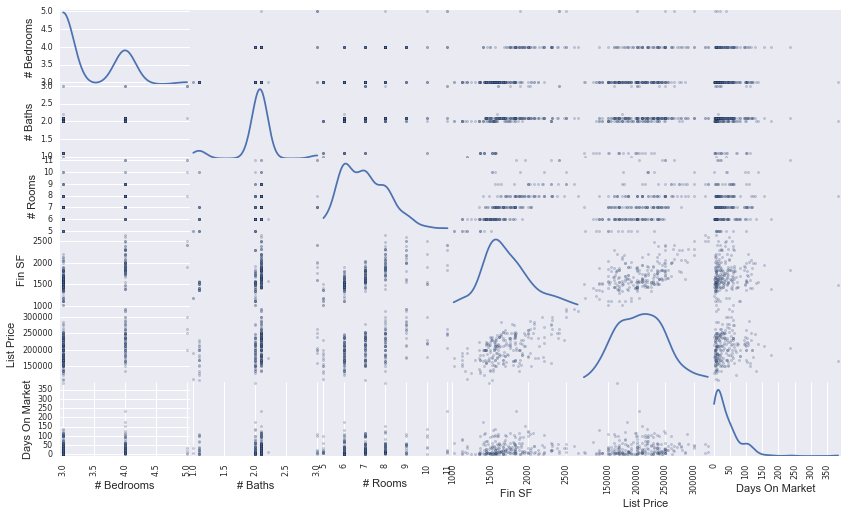

In [18]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

                # Bedrooms   # Baths   # Rooms    Fin SF  List Price  \
# Bedrooms        1.000000  0.348455  0.573038  0.664296    0.399004   
# Baths           0.348455  1.000000  0.274211  0.376911    0.264866   
# Rooms           0.573038  0.274211  1.000000  0.712341    0.493223   
Fin SF            0.664296  0.376911  0.712341  1.000000    0.588513   
List Price        0.399004  0.264866  0.493223  0.588513    1.000000   
Days On Market    0.013828 -0.041557  0.101306  0.040198    0.117889   
Target            0.082686  0.022249  0.103371  0.162052    0.246081   

                Days On Market    Target  
# Bedrooms            0.013828  0.082686  
# Baths              -0.041557  0.022249  
# Rooms               0.101306  0.103371  
Fin SF                0.040198  0.162052  
List Price            0.117889  0.246081  
Days On Market        1.000000  0.177035  
Target                0.177035  1.000000  


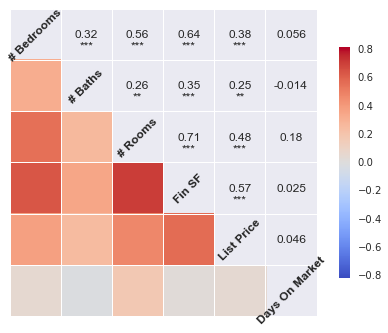

In [19]:
print data.corr(method='pearson')
import seaborn as sns
_ = sns.corrplot(features)

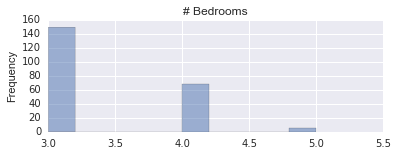

# Bedrooms does not follow a normal distribution


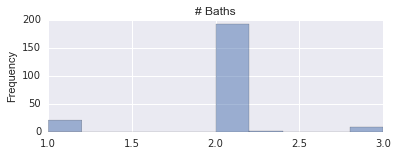

# Baths does not follow a normal distribution


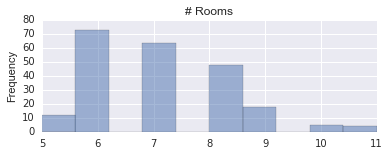

# Rooms does not follow a normal distribution


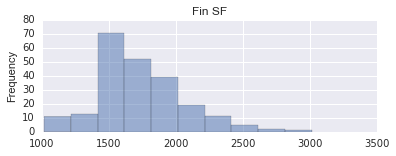

Fin SF does not follow a normal distribution


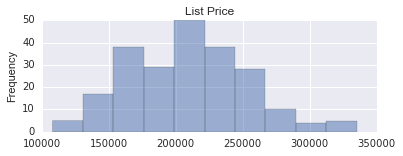

List Price does follow a normal distribution


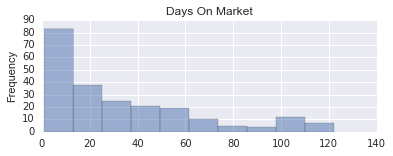

Days On Market does not follow a normal distribution


In [20]:
import scipy.stats as stats

for c in features.columns:
    x = data[c]
    x.plot(kind='hist', alpha=0.5, figsize = (6,2), title=c)
    plt.show()
    z,pvalue = stats.normaltest(x)
    isnormal = 'does' if pvalue > 0.055 else "does not"
    print "{} {} follow a normal distribution".format(c, isnormal)

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)